### Import Modules dependencies

In [21]:
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install numpy

# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install pandas

## Read CSV and format a little to get a dataset to plot

In [24]:
import pandas as pd
import os

# time_series = '.\COVID-19\csse_covid_19_data\csse_covid_19_time_series'
# df = pd.read_csv(os.path.join(time_series, 'time_series_covid19_confirmed_global.csv'))

import urllib.request
from os import getcwd

# Read confirmed cases
url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
webUrl = urllib.request.urlopen(url)
data = webUrl.read()
directory = getcwd()
confirmed_file = directory + '\COVID-19_Confirmed.csv'
f = open(confirmed_file,'w')
f.write(data.decode("utf-8"))
print(confirmed_file)
f.close()

# Read deaths
url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"
webUrl = urllib.request.urlopen(url)
data = webUrl.read()
directory = getcwd()
death_file = directory + '\COVID-19_Deaths.csv'
f = open(death_file,'w')
f.write(data.decode("utf-8"))
print(death_file)
f.close()

df = pd.read_csv(confirmed_file)
df.drop(columns=['Province/State', 'Lat', 'Long'], inplace = True)
df2 = df.transpose()
df2.columns=df2.iloc[0]
df2.drop(index='Country/Region', inplace = True)
df3 = df2.groupby(level=0,axis=1).sum()


C:\Users\gorozco\Documents\Personal\PyProjects\COVID-19_Confirmed.csv
C:\Users\gorozco\Documents\Personal\PyProjects\COVID-19_Deaths.csv


## Modify what country you want to see below

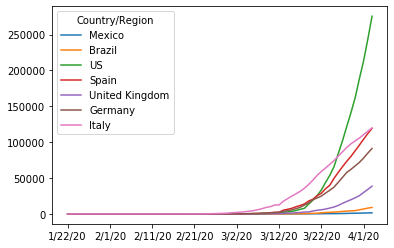

In [25]:
df3.plot(y=['Mexico','Brazil','US','Spain','United Kingdom','Germany','Italy'])

##### Below we analyze the inflexion points on the confirm cases, this is getting the first derivative and normalize data to compare where each country is and how is progressing

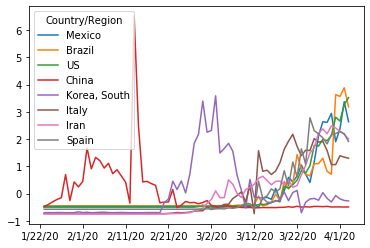

In [26]:
df4 = df3.diff()
normalized_df=(df4-df4.mean())/df4.std()
normalized_df.plot(y=['Mexico','Brazil','US','China','Korea, South','Italy','Iran','Spain'])

# Death Ratio deaths/confirmed

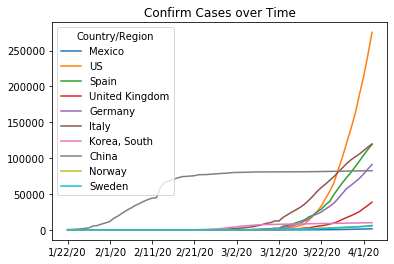

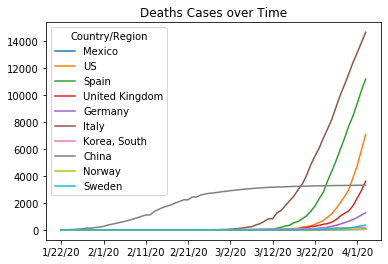

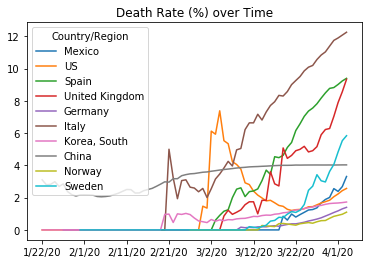

In [27]:
# time_series = '.\COVID-19\csse_covid_19_data\csse_covid_19_time_series'

df_d = pd.read_csv(death_file)
df_d.drop(columns=['Province/State', 'Lat', 'Long'], inplace = True)
df2_d = df_d.transpose()
df2_d.columns=df2_d.iloc[0]
df2_d.drop(index='Country/Region', inplace = True)
df3_d = df2_d.groupby(level=0,axis=1).sum()
df_ratio = df3_d/df3 * 100
df3.plot(y=['Mexico','US','Spain','United Kingdom','Germany','Italy','Korea, South','China','Norway','Sweden'],title='Confirm Cases over Time')
df3_d.plot(y=['Mexico','US','Spain','United Kingdom','Germany','Italy','Korea, South','China','Norway','Sweden'],title='Deaths Cases over Time')
df_ratio.plot(y=['Mexico','US','Spain','United Kingdom','Germany','Italy','Korea, South','China','Norway','Sweden'],title='Death Rate (%) over Time')

##### Analyzing a subset of coutnries... below why did Sweden was doing "good" compared to Norway for example, and then things happen....

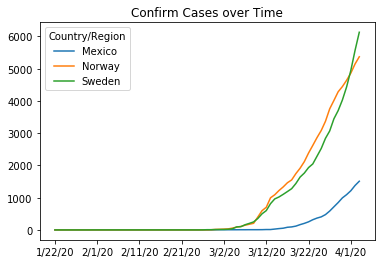

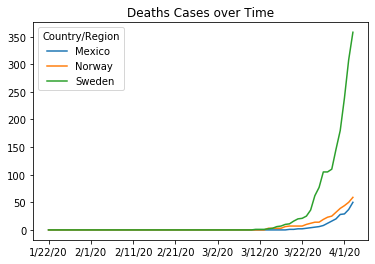

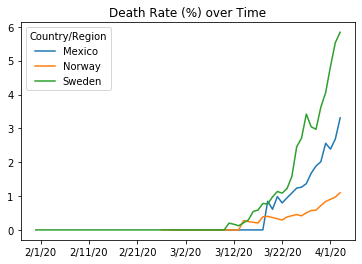

In [28]:
df3.plot(y=['Mexico','Norway','Sweden'],title='Confirm Cases over Time')
df3_d.plot(y=['Mexico','Norway','Sweden'],title='Deaths Cases over Time')
df_ratio.plot(y=['Mexico','Norway','Sweden'],title='Death Rate (%) over Time')